Устанавливаем зависимости

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Функция преобразований

In [37]:
def build(numDisparities, blockSize):
  img_l = cv2.imread('DSC02692.JPG', 2)
  img_r = cv2.imread('DSC02694.JPG', 2)

  calibration_data = np.load('calibration.npz')
  mtx = calibration_data['mtx'] # матрица камеры
  dist = calibration_data['dist'] # коэффициенты дисторсии

  # Для нового изображения узнаём размеры
  h, w = img_r.shape[:2]
  newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

  # создание отображающих матриц
  mapx1_1, mapy2_1 = cv2.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w, h), cv2.CV_32FC1)
  mapx1_2, mapy2_2 = cv2.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w, h), cv2.CV_32FC1)
  dst_one = cv2.remap(img_l, mapx1_1, mapy2_1, cv2.INTER_LINEAR)
  dst_two = cv2.remap(img_r, mapx1_2, mapy2_2, cv2.INTER_LINEAR)

  # создание объекта алгоритма StereoBM
  stereo = cv2.StereoBM_create(numDisparities=numDisparities, blockSize=blockSize)
  disparity = stereo.compute(dst_one, dst_two)  # вычисление карты диспаритета
  disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U) # нормализация карты диспаритета
  
  # изменение размера изображения
  resized_img = cv2.resize(disparity_normalized, (800, 900))
  # построим
  plt.imshow(resized_img)

numDisparities определяет максимальное значение диспаритета (disparity range), то есть максимальное значение разности координат для соответствующих точек на левом и правом изображениях. Чем больше значение numDisparities, тем больше глубина, которую можно измерить, но это также означает, что время вычисления увеличивается.

blockSize определяет размер блока (размер окна), используемый для вычисления корреляции между соответствующими пикселями на левом и правом изображениях. Чем больше значение blockSize, тем более грубым становится вычисление, но это также может помочь избежать ошибок измерения глубины в сложных сценах.

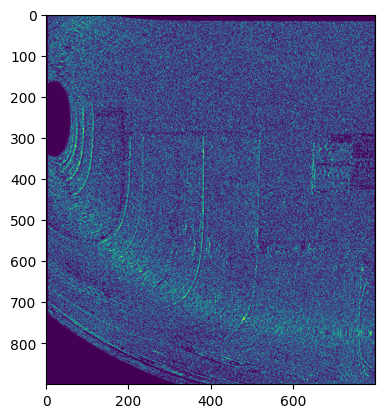

In [31]:
build(16,5)

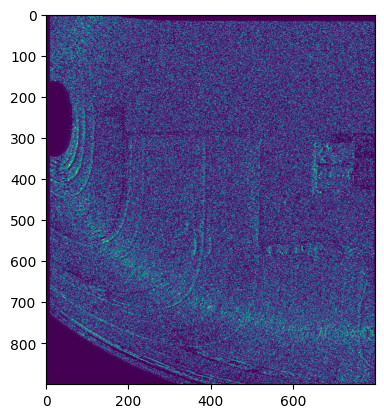

In [32]:
build(32,5)

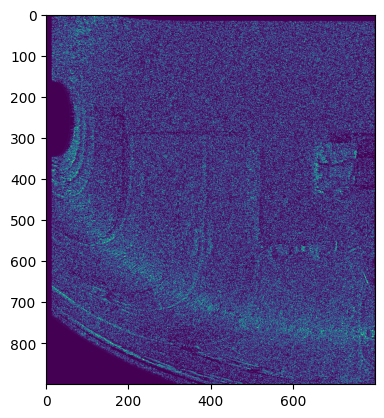

In [36]:
build(48,5)

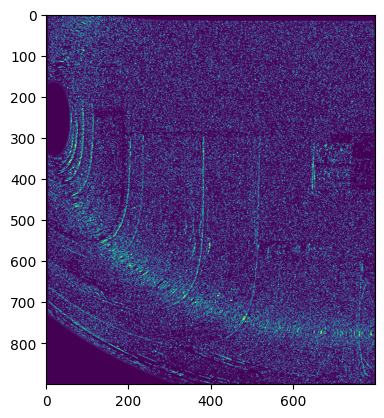

In [33]:
build(16,9)

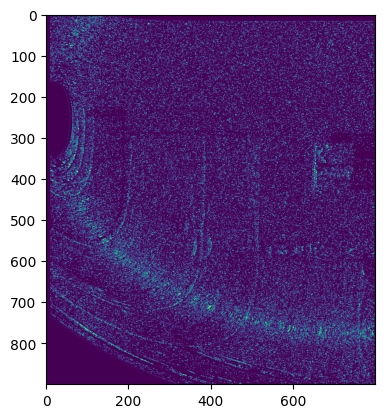

In [34]:
build(32,9)

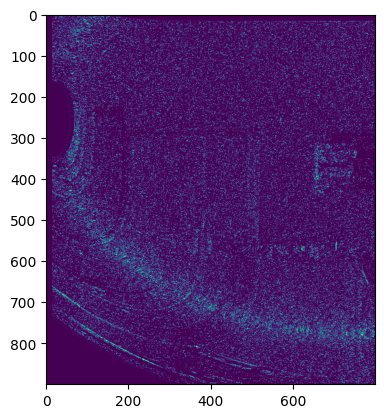

In [17]:
build(48,9)

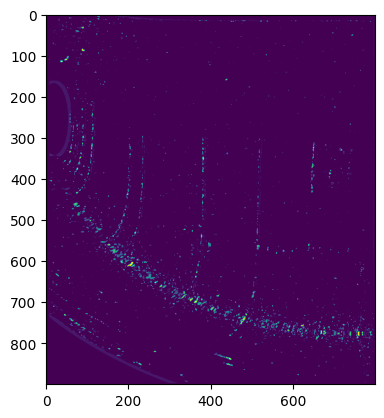

In [35]:
build(16,25)

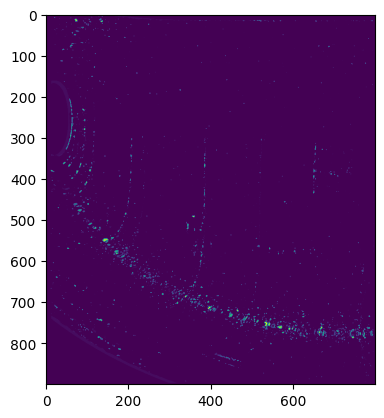

In [19]:
build(32,25)

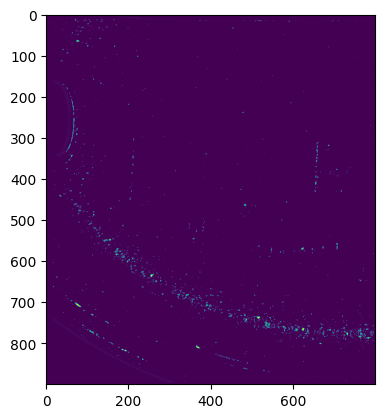

In [20]:
build(48,25)